In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
fact = pd.read_csv("Clean_fact.csv")
dim = pd.read_csv("Clean_Dim.csv")
df = pd.read_csv("Clean_Data.csv")

In [3]:
fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   date                         9893 non-null   object
 1   name                         9893 non-null   object
 2   age                          9893 non-null   int64 
 3   gender                       9893 non-null   object
 4   armed                        9893 non-null   object
 5   race                         9893 non-null   object
 6   City                         9893 non-null   object
 7   Code                         9893 non-null   object
 8   flee                         9893 non-null   object
 9   body_camera                  9893 non-null   bool  
 10  signs_of_mental_illness      9893 non-null   bool  
 11  police_departments_involved  9893 non-null   object
 12  year                         9893 non-null   int64 
dtypes: bool(2), int64(2), object(9)
m

#                                                       ___________________________ 
#                                                       prepreation for analysis
#                                                       ___________________________ 

# Feature Engneering

# Region Coloumn

In [4]:
region_map = {
    # Northeast 
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast', 
    'RI': 'Northeast', 'VT': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast', 
    'PA': 'Northeast',
    
    # Midwest
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest', 
    'WI': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 
    'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest',
    
    # South 
    'DE': 'South', 'FL': 'South', 'GA': 'South', 'MD': 'South', 'NC': 'South', 
    'SC': 'South', 'VA': 'South', 'DC': 'South', 'WV': 'South', 'AL': 'South', 
    'KY': 'South', 'MS': 'South', 'TN': 'South', 'AR': 'South', 'LA': 'South', 
    'OK': 'South', 'TX': 'South',
    
    # West 
    'AZ': 'West', 'CO': 'West', 'ID': 'West', 'MT': 'West', 'NV': 'West', 
    'NM': 'West', 'UT': 'West', 'WY': 'West', 'AK': 'West', 'CA': 'West', 
    'HI': 'West', 'OR': 'West', 'WA': 'West'
}

In [5]:
fact["Region"] = fact["Code"].map(region_map)

    # Northeast 
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast', 
    'RI': 'Northeast', 'VT': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast', 
    'PA': 'Northeast',
    
    # Midwest
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest', 
    'WI': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 
    'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest',
    
    # South 
    'DE': 'South', 'FL': 'South', 'GA': 'South', 'MD': 'South', 'NC': 'South', 
    'SC': 'South', 'VA': 'South', 'DC': 'South', 'WV': 'South', 'AL': 'South', 
    'KY': 'South', 'MS': 'South', 'TN': 'South', 'AR': 'South', 'LA': 'South', 
    'OK': 'South', 'TX': 'South',
    
    # West 
    'AZ': 'West', 'CO': 'West', 'ID': 'West', 'MT': 'West', 'NV': 'West', 
    'NM': 'West', 'UT': 'West', 'WY': 'West', 'AK': 'West', 'CA': 'West', 
    'HI': 'West', 'OR': 'West', 'WA': 'West'

# Age Groups

In [6]:
bins = [
    0,    
    18,
    31,   
    51,
    np.inf
]

labels = [
    'Minor (<18)',
    'Young Adult (18-30)',
    'Adult (31-50)',
    'Senior (51+)'
]

fact['Age Group'] = pd.cut(
    fact['age'],
    bins=bins,
    labels=labels,
    right=False
)

Minor (<18)

Young Adult (18-30)

Adult (31-50)

Senior (51+)

# Threat Segment

In [ ]:
conditions = [
    (fact['armed'].isin(['gun', 'replica'])) & (fact['flee'] == 'not'),
    (fact['armed'] != 'unarmed') & (~fact['armed'].isin(['gun', 'replica', 'vehicle'])) & (fact['flee'] == 'not'),
    (fact['armed'].isin(['gun', 'replica'])) & (fact['flee'] != 'not'),
    (fact['armed'] == 'vehicle'),
    (fact['armed'] != 'unarmed') & (fact['signs_of_mental_illness'] == True),
    (fact['flee'] != 'not' ), 
    (fact['armed'] == 'unarmed') & (fact['flee'] == 'not')
]

In [8]:
choices = [
    '7. Critical Threat (Gun Confrontation)',
    '6. High Threat (Weapon Confrontation)',
    '5. High Risk (Fleeing with Gun)',
    '4. Medium Risk (Fleeing with Vehicle)',
    '3. Special Case (Armed Mental Crisis)',
    '2. Low Risk (Fleeing Unarmed/Minor)',
    '1. Minimal Threat (Unarmed Static)'
]

In [9]:
fact['Threat_Segment'] = np.select(conditions, choices, default='Other/Unknown')

In [10]:
fact.isnull().sum()

date                           0
name                           0
age                            0
gender                         0
armed                          0
race                           0
City                           0
Code                           0
flee                           0
body_camera                    0
signs_of_mental_illness        0
police_departments_involved    0
year                           0
Region                         0
Age Group                      0
Threat_Segment                 0
dtype: int64

    '7. Critical Threat (Gun Confrontation)'
    '6. High Threat (Weapon Confrontation)'
    '5. High Risk (Fleeing with Gun)'
    '4. Medium Risk (Fleeing with Vehicle)'
    '3. Special Case (Armed Mental Crisis)'
    '2. Low Risk (Fleeing Unarmed/Minor)'
    '1. Minimal Threat (Unarmed Static)'

In [11]:
fact.to_csv('fact2.csv' , index=False)

# ------------------------------------------------------------------
# 1- Over View
# ------------------------------------------------------------------
(Here we define the scale of the problem, the locations, and the victims.)

# Q1 - Is the number of incidents increasing or decreasing over time?

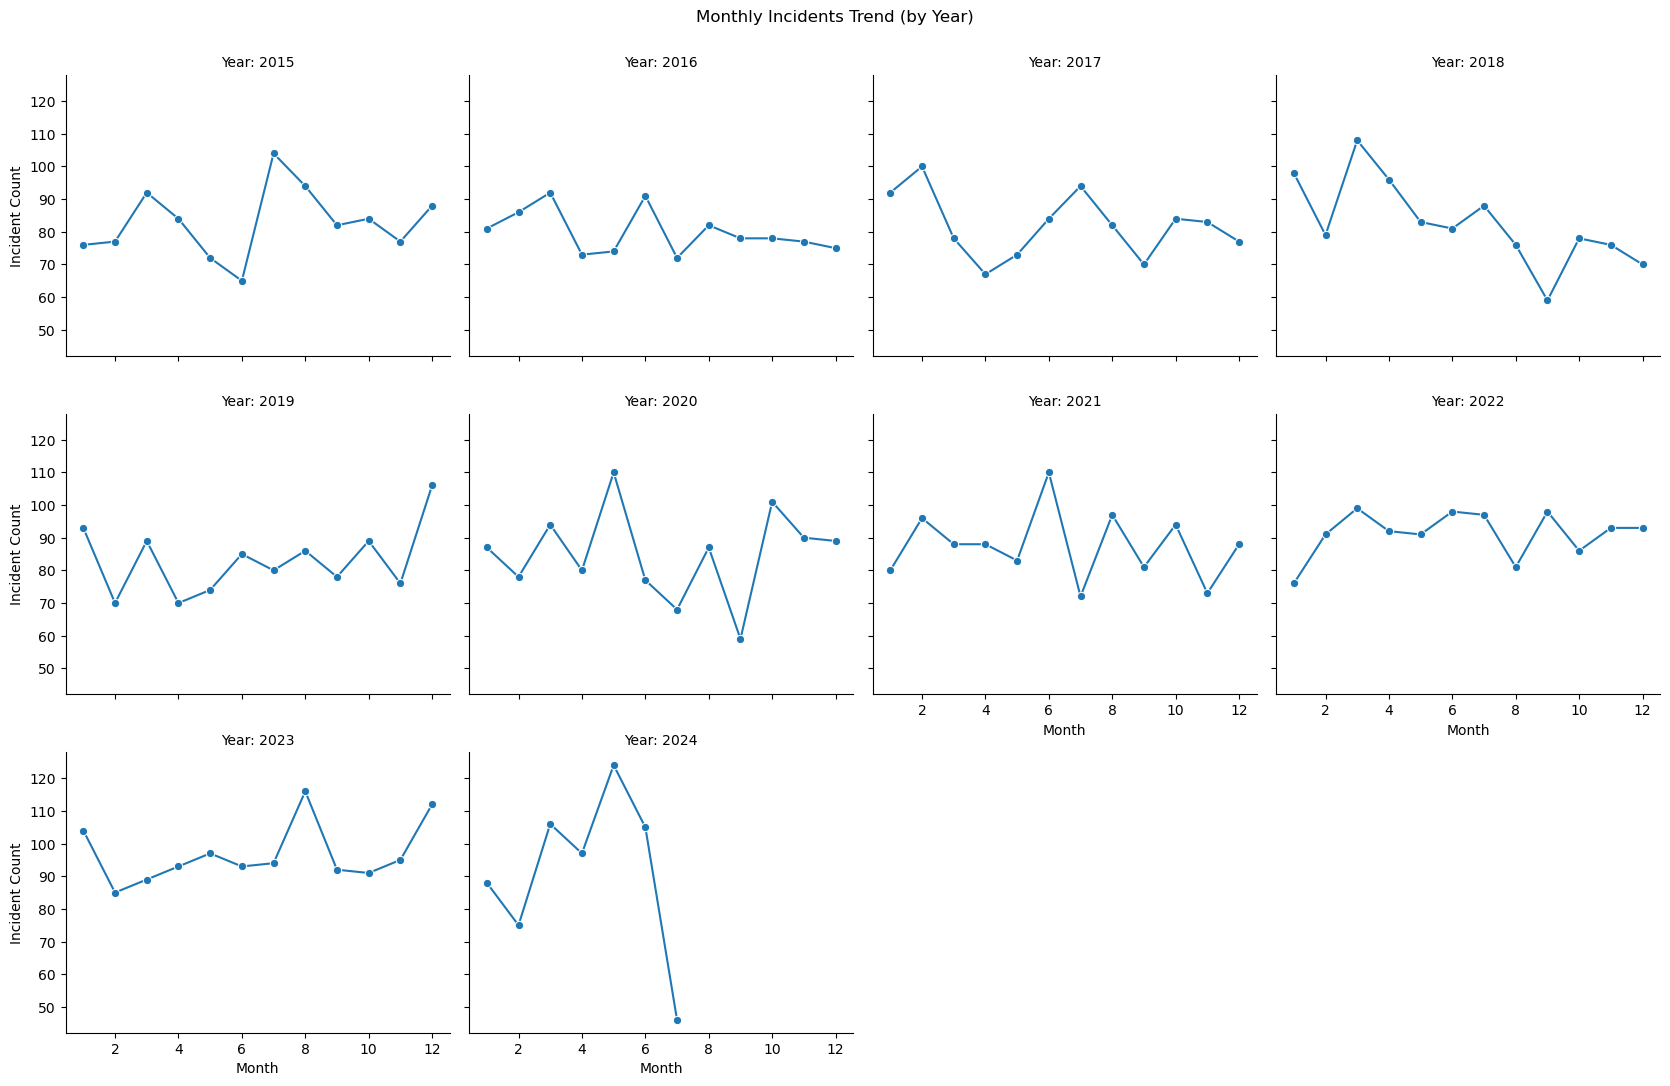

In [13]:
fact["date"] = pd.to_datetime(fact["date"])
fact["year"] = fact["date"].dt.year
fact["month"] = fact["date"].dt.month

monthly_trend = fact.groupby(["year", "month"]).size().reset_index(name="count")
g = sns.relplot(
    data=monthly_trend, 
    x="month", 
    y="count", 
    col="year",          
    col_wrap=4,          
    kind="line",        
    marker="o",          
    height=3.5,          
    aspect=1.2
)
g.fig.suptitle("Monthly Incidents Trend (by Year)", y=1.03) 
g.set_axis_labels("Month", "Incident Count")
g.set_titles("Year: {col_name}")

plt.show()

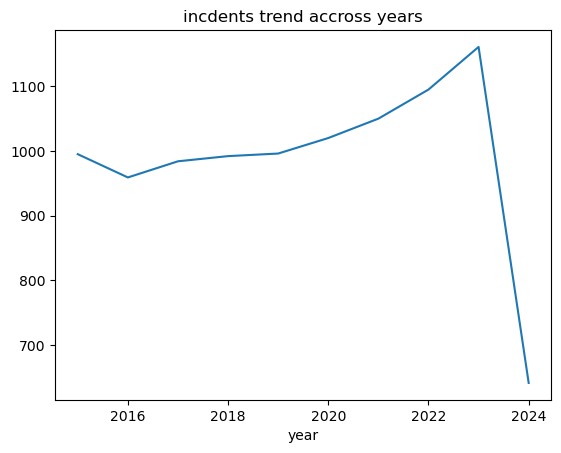

In [14]:
yearly_trend = fact.groupby('year').size()
yearly_trend.plot(kind='line')
plt.title("incdents trend accross years")
plt.show()

# Q2 - Which areas have the highest concentration of incidents?

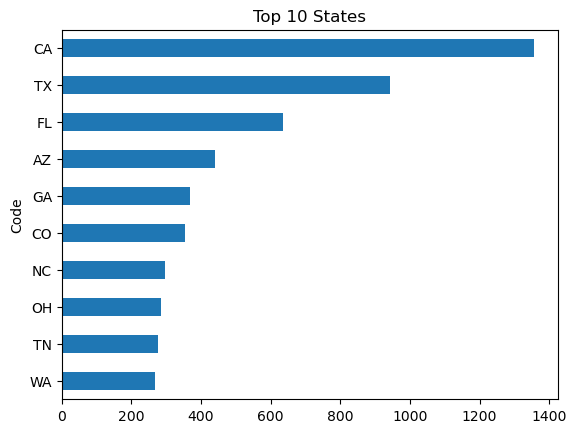

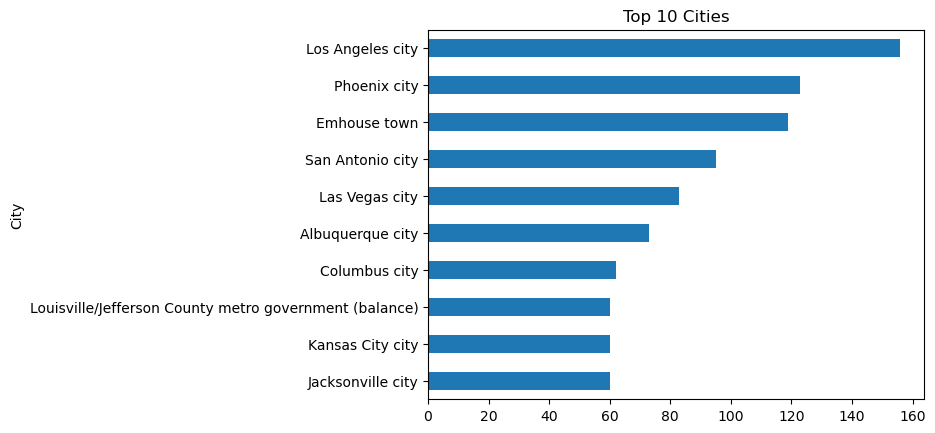

In [15]:
top_10_states = fact['Code'].value_counts().head(10).sort_values()
top_10_states.plot(kind='barh', title='Top 10 States')
plt.show()

top_10_cities = fact['City'].value_counts().head(10).sort_values()
top_10_cities.plot(kind='barh', title='Top 10 Cities')
plt.show()

# Q - 3 How are incidents distributed across different regions ?

In [16]:
fact['Region'].value_counts()

Region
South        4207
West         3364
Midwest      1625
Northeast     697
Name: count, dtype: int64

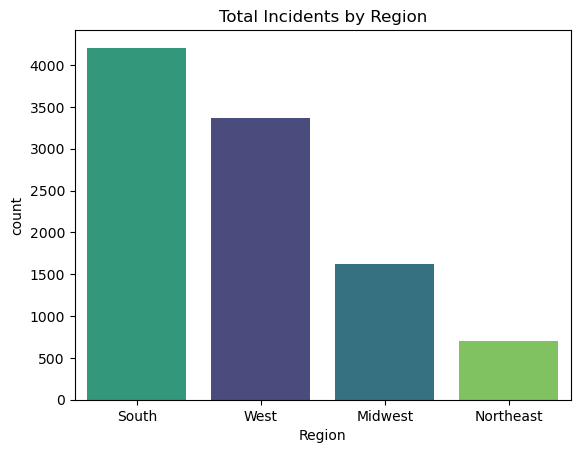

In [17]:
sns.countplot(data=fact, x='Region', palette='viridis',hue = "Region", order=fact['Region'].value_counts().index)
plt.title("Total Incidents by Region")
plt.show()

# Q-4 What does the typical victim look like? (Race, Gender, Average Age)

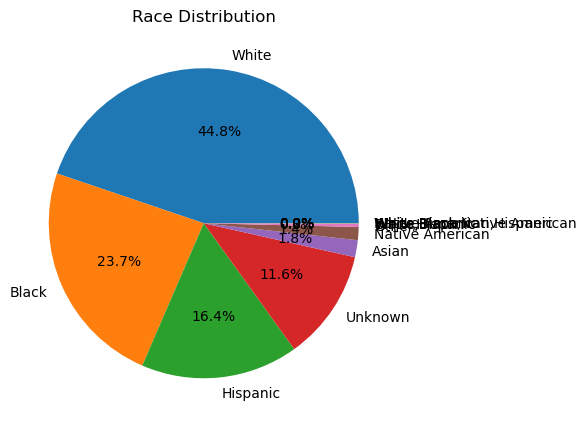

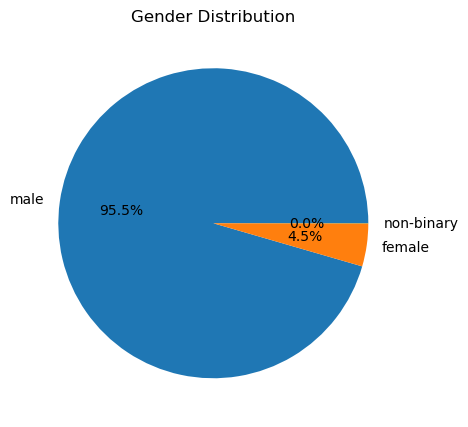

In [18]:
# Race Pie
race_dist = fact['race'].value_counts(normalize=True) * 100
plt.figure(figsize=(5,20))
plt.pie(race_dist, labels=race_dist.index, autopct='%1.1f%%')
plt.title("Race Distribution")
plt.show()

# Gender Pie
gender_dist = fact['gender'].value_counts(normalize=True) * 100

plt.figure(figsize=(5,20))
plt.pie(gender_dist, labels=gender_dist.index, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()


In [19]:
#race distribution
print("____________Race_____________")
race_dist = fact['race'].value_counts(normalize=True) * 100
print(race_dist.round(2).to_markdown())

#gender distribution
print("____________Gender_____________")
gender_dist = fact['gender'].value_counts(normalize=True) * 100
print(gender_dist.round(2).to_markdown())
print("____________Age_____________")
#Age statistics
print(fact['age'].describe().to_markdown())

____________Race_____________
| race                        |   proportion |
|:----------------------------|-------------:|
| White                       |        44.8  |
| Black                       |        23.71 |
| Hispanic                    |        16.41 |
| Unknown                     |        11.56 |
| Asian                       |         1.77 |
| Native American             |         1.36 |
| Other                       |         0.31 |
| White,Black                 |         0.02 |
| Black,Hispanic              |         0.02 |
| White,Black,Native American |         0.01 |
| White,Hispanic              |         0.01 |
| Native American,Hispanic    |         0.01 |
____________Gender_____________
| gender     |   proportion |
|:-----------|-------------:|
| male       |        95.51 |
| female     |         4.47 |
| non-binary |         0.02 |
____________Age_____________
|       |       age |
|:------|----------:|
| count | 9893      |
| mean  |   37.316  |
| std   |   1

# ------------------------------------------------------------------
# 2- Victims analysis
# ------------------------------------------------------------------

# Q - 5 What is the real age distribution of the victims?

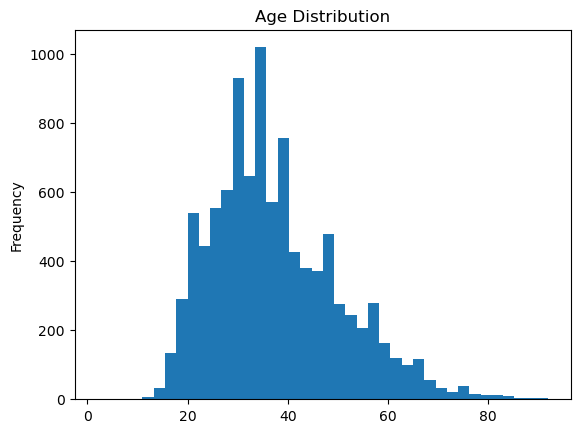

In [20]:
fact['age'].plot(kind='hist', bins=40, title='Age Distribution')
plt.show()

# Q - 6 Which Age Group is most involved in incidents ?

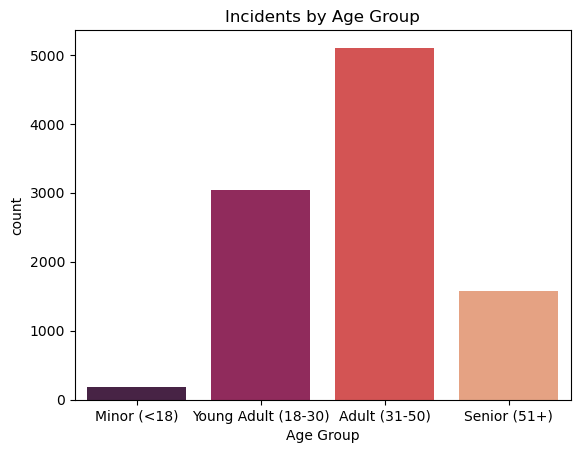

In [21]:
age_order = ['Minor (<18)', 'Young Adult (18-30)', 'Adult (31-50)', 'Senior (51+)']
sns.countplot(data=fact, x='Age Group',hue = 'Age Group', order=age_order, palette='rocket')
plt.title("Incidents by Age Group")
plt.show()

# Q-7 Does the age of victims differ between races?

<Figure size 1400x700 with 0 Axes>

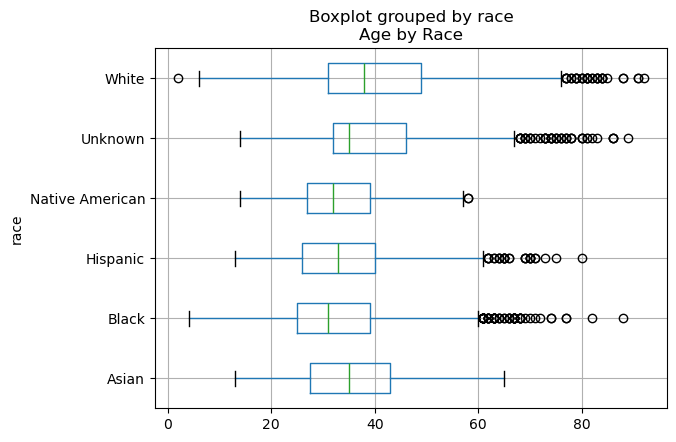

In [22]:

top_races_list = fact['race'].value_counts().head(6).index.tolist()
df_top_races = fact[fact['race'].isin(top_races_list)]

plt.figure(figsize=(14, 7))
df_top_races.boxplot(column='age', by='race', vert=False)
plt.title('Age by Race')
plt.show()

# 

# Q-8 Which races have the highest percentage of unarmed victims ?

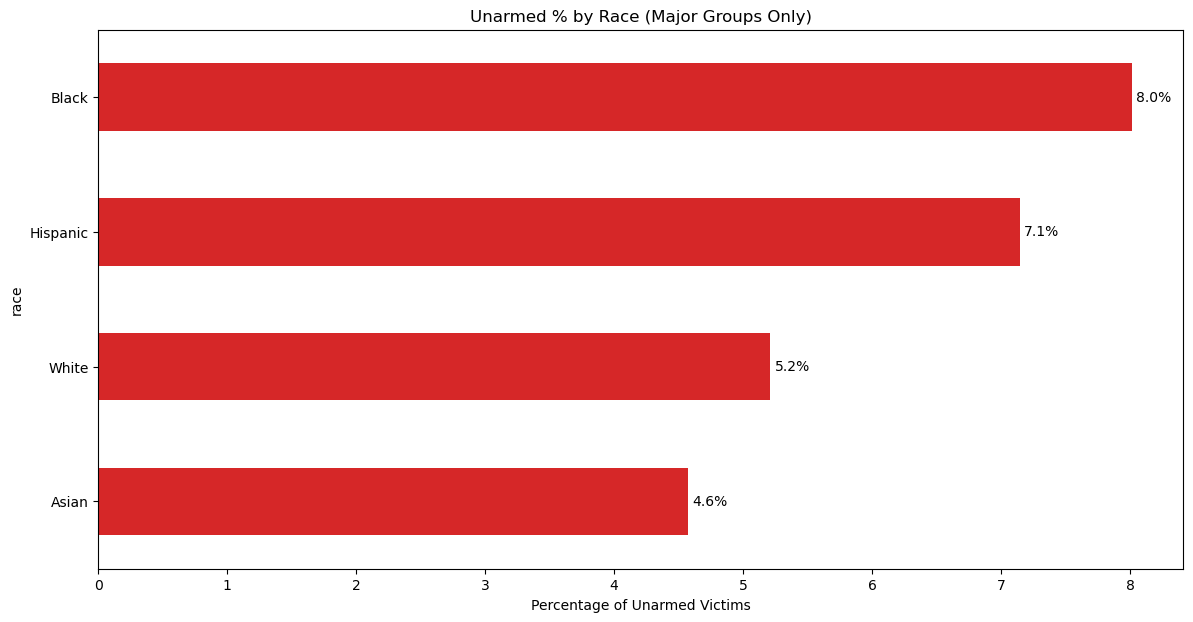

In [23]:
race_counts = fact['race'].value_counts()
valid_races = race_counts[race_counts > 100].index.tolist()

exclude_list = ['Unknown', 'Other', 'Native American']

for item in exclude_list:
    if item in valid_races:
        valid_races.remove(item)

df_filtered_races = fact[fact['race'].isin(valid_races)].copy()

df_filtered_races['is_unarmed'] = df_filtered_races['armed'] == 'unarmed'
unarmed_pct_by_race = df_filtered_races.groupby('race')['is_unarmed'].mean() * 100
unarmed_pct_by_race = unarmed_pct_by_race.sort_values(ascending=True)

plt.figure(figsize=(14, 7))
ax = unarmed_pct_by_race.plot(kind='barh', title='Unarmed % by Race (Major Groups Only)', color='#d62728')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)

plt.xlabel('Percentage of Unarmed Victims')
plt.show()

# Q-9 Do Black victims appear at disproportionately higher rates compared to their share of the local population?

In [24]:
data_analysis_complete = df[df['year'] < 2024].copy()

top_20_cities_series = fact['City'].value_counts().head(20)
top_20_df = top_20_cities_series.reset_index()
top_20_df.columns = ['City', 'Total Victims']

pop_shares = data_analysis_complete.groupby('City')[['share_black', 'share_white']].mean()
pop_shares_df = pop_shares.reset_index()
pop_shares_df.columns = ['City', 'Pop_Pct_Black', 'Pop_Pct_White']

victim_pct = fact.groupby('City')['race'].value_counts(normalize=True).mul(100)
victim_shares = victim_pct.unstack(level='race', fill_value=0)

victim_shares_df = victim_shares[['Black', 'White']].reset_index()
victim_shares_df.columns = ['City', 'Victim_Pct_Black', 'Victim_Pct_White']

table_step1 = pd.merge(top_20_df, pop_shares_df, on='City')
final_table = pd.merge(table_step1, victim_shares_df, on='City')

final_table_rounded = final_table.round(1)

final_table_rounded = final_table_rounded[final_table_rounded['City'] != 'Emhouse town']

print(final_table_rounded.to_markdown(index=False))

| City                                                   |   Total Victims |   Pop_Pct_Black |   Pop_Pct_White |   Victim_Pct_Black |   Victim_Pct_White |
|:-------------------------------------------------------|----------------:|----------------:|----------------:|-------------------:|-------------------:|
| Los Angeles city                                       |             156 |             8.8 |            48   |               21.8 |               12.8 |
| Phoenix city                                           |             123 |             7.1 |            68.5 |               16.3 |               36.6 |
| San Antonio city                                       |              95 |             6.8 |            68.7 |               10.5 |               20   |
| Las Vegas city                                         |              83 |            11.8 |            59.1 |               19.3 |               42.2 |
| Albuquerque city                                       |            

# ------------------------------------------------------------------
# 3 - Incident Analysis
# ------------------------------------------------------------------

# Q-10 What are the top 10 most common armed types

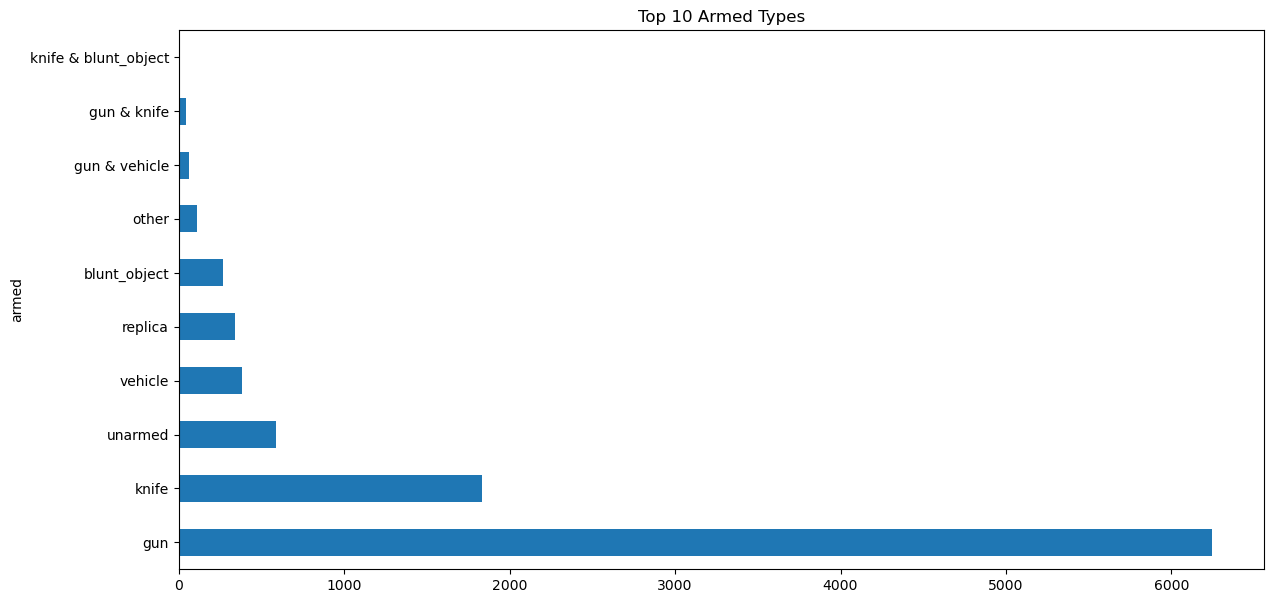

In [25]:
top_10_armed = fact['armed'].value_counts().head(10)

plt.figure(figsize=(14, 7))
top_10_armed.plot(kind='barh', title='Top 10 Armed Types')
plt.show()

# Q - 11 What is the overall distribution of armed types ?

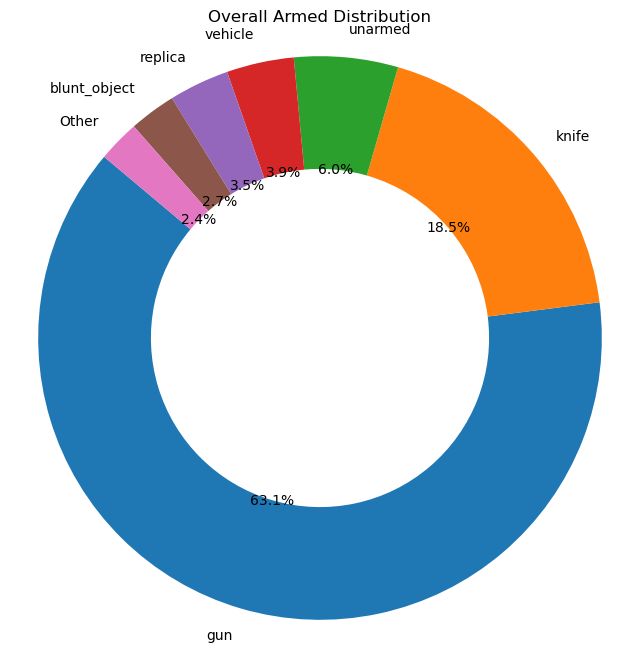

In [26]:
plt.figure(figsize=(8, 8))
armed_counts = fact['armed'].value_counts()
top_6_counts = armed_counts.head(6)
other_sum = armed_counts.tail(-6).sum()
other_slice = pd.Series({'Other': other_sum})
plot_data = pd.concat([top_6_counts, other_slice])

plt.pie(
    plot_data,
    labels=plot_data.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={"width": 0.4}
)

plt.title("Overall Armed Distribution")
plt.axis("equal")  
plt.show()

# Q-12 What is the percentage of unarmed vs armed victims within each racial group?

In [27]:
df['is_unarmed'] = df['armed'] == 'unarmed'
data_analysis_complete = df[df['year'] < 2024].copy()

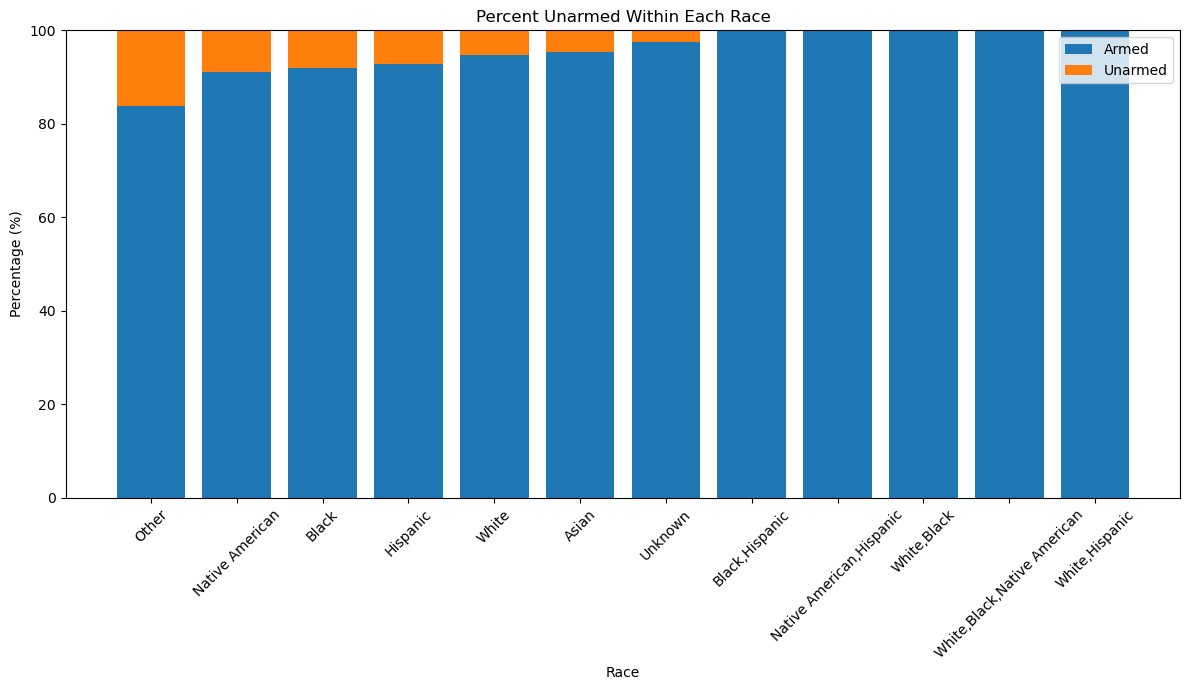

In [28]:
# Prepare the table
unarmed_vs_race = pd.crosstab(df['race'], df['is_unarmed'], normalize='index') * 100
unarmed_vs_race.columns = ['Armed', 'Unarmed']
unarmed_vs_race = unarmed_vs_race.sort_values(by='Unarmed', ascending=False)

# Plot
plt.figure(figsize=(12, 7))

plt.bar(unarmed_vs_race.index, unarmed_vs_race['Armed'], label='Armed')
plt.bar(unarmed_vs_race.index, unarmed_vs_race['Unarmed'], 
        bottom=unarmed_vs_race['Armed'], 
        label='Unarmed')

plt.title("Percent Unarmed Within Each Race")
plt.ylabel("Percentage (%)")
plt.xlabel("Race")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


# Q - 13  How does the Threat Level vary by Race ?

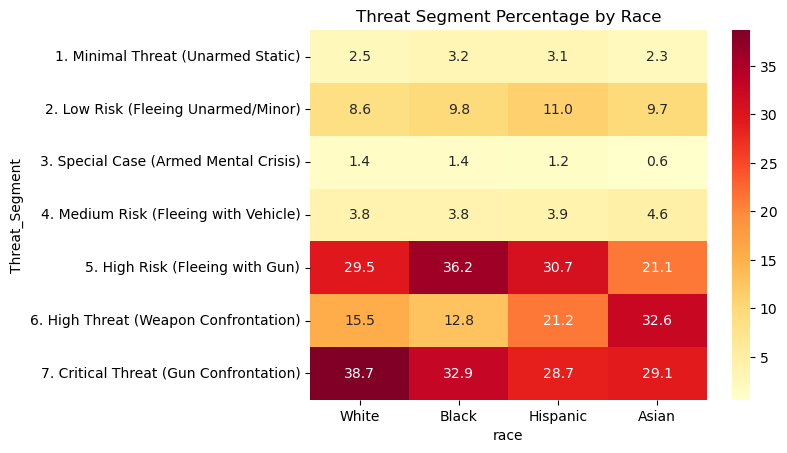

In [29]:
top_races = ['White', 'Black', 'Hispanic', 'Asian'] 
heatmap_data = pd.crosstab(fact['Threat_Segment'], fact['race'], normalize='columns') * 100
heatmap_data = heatmap_data[top_races]

sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Threat Segment Percentage by Race")
plt.show()

# Q-14 How many were fleeing? And were they armed? 

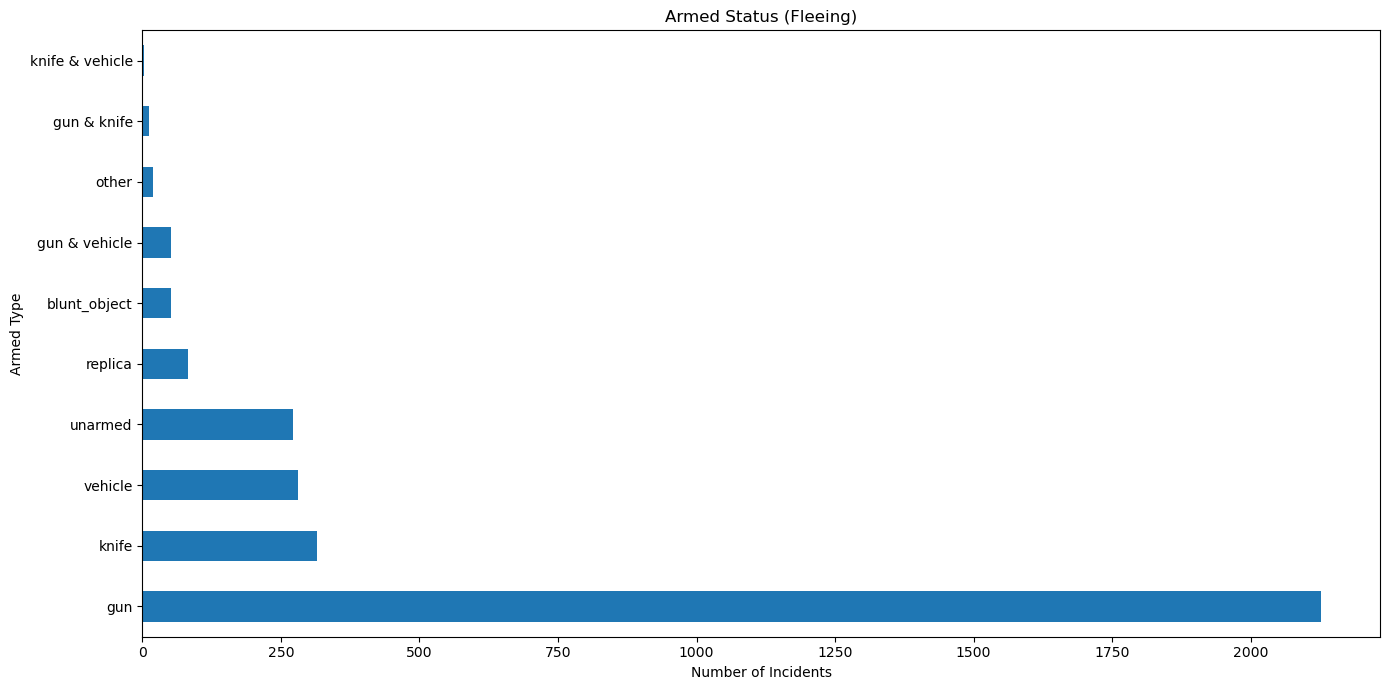

In [30]:
df_fleeing = fact[fact['flee'].isin(['car', 'foot', 'other'])]

fleeing_armed_dist = df_fleeing['armed'].value_counts().head(10)

plt.figure(figsize=(14, 7))
ax = fleeing_armed_dist.plot(kind='barh', title='Armed Status (Fleeing)')
plt.xlabel('Number of Incidents')
plt.ylabel('Armed Type')

plt.tight_layout()
plt.savefig('q10_fleeing_armed_status.png', bbox_inches='tight')
plt.show()

# Q-15 Does mental illness affect the type of weapon involved?

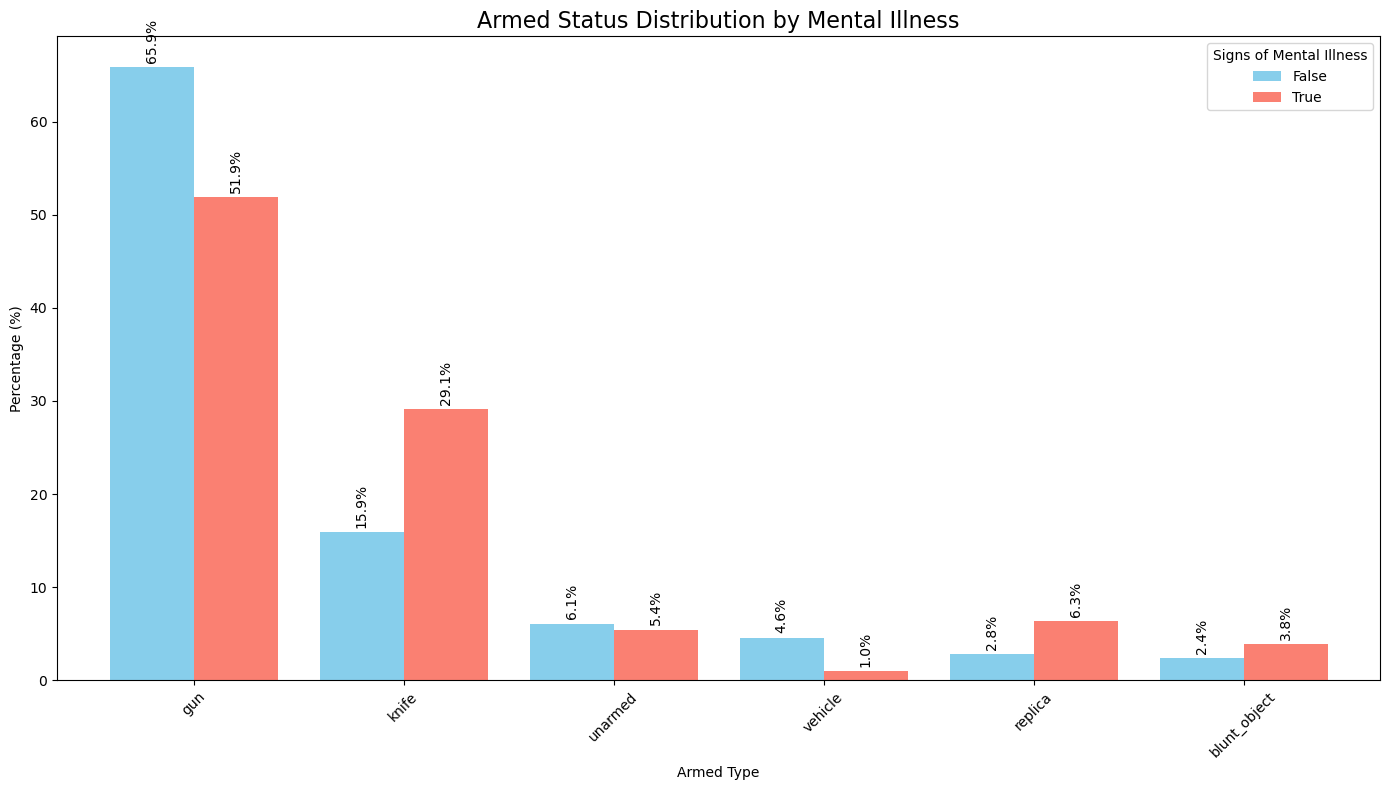

In [31]:
mental_health_armed = pd.crosstab(fact['signs_of_mental_illness'], fact['armed'])

mental_health_armed_prop = mental_health_armed.apply(lambda x: x*100/sum(x), axis=1)


top_6_armed = mental_health_armed.sum().sort_values(ascending=False).head(6).index
mental_health_armed_prop = mental_health_armed_prop[top_6_armed]

ax = mental_health_armed_prop.T.plot(
    kind='bar',
    figsize=(14, 8),
    width=0.8,
    color=['skyblue', 'salmon']  # False = skyblue, True = salmon
)

plt.title('Armed Status Distribution by Mental Illness', fontsize=16)
plt.ylabel('Percentage (%)')
plt.xlabel('Armed Type')
plt.xticks(rotation=45)
plt.legend(title='Signs of Mental Illness', labels=['False', 'True'], loc='upper right')

for c in ax.containers:
    ax.bar_label(c, fmt='%.1f%%', label_type='edge', padding=3, rotation=90)

plt.tight_layout()
plt.savefig('q11_armed_by_mental_illness_grouped.png', bbox_inches='tight')
plt.show()

# Q - 16 What is the distribution of Threat Segments? Which levels are most ?

In [32]:
threat = fact.groupby("Threat_Segment")["Threat_Segment"].count().sort_values(ascending=False)

In [33]:
threat

Threat_Segment
7. Critical Threat (Gun Confrontation)    3415
5. High Risk (Fleeing with Gun)           3173
6. High Threat (Weapon Confrontation)     1590
2. Low Risk (Fleeing Unarmed/Minor)        948
4. Medium Risk (Fleeing with Vehicle)      382
1. Minimal Threat (Unarmed Static)         256
3. Special Case (Armed Mental Crisis)      129
Name: Threat_Segment, dtype: int64

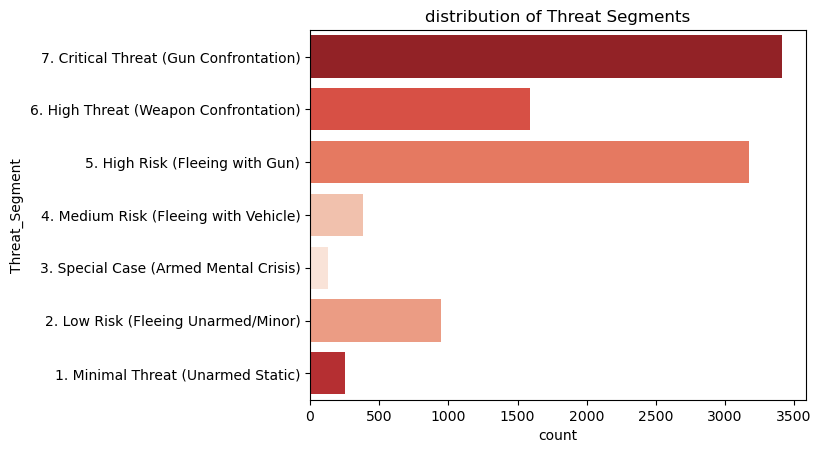

In [34]:
segment_order = sorted(fact['Threat_Segment'].unique(), reverse=True)
sns.countplot(
    data=fact,
    y='Threat_Segment',
    order=segment_order,
    hue = "Threat_Segment",
    palette="Reds_r"
)
plt.title("distribution of Threat Segments")
plt.show()

# Q - 17 Has the proportion of Minimal Threat (Unarmed Static) incidents changed over time ? 

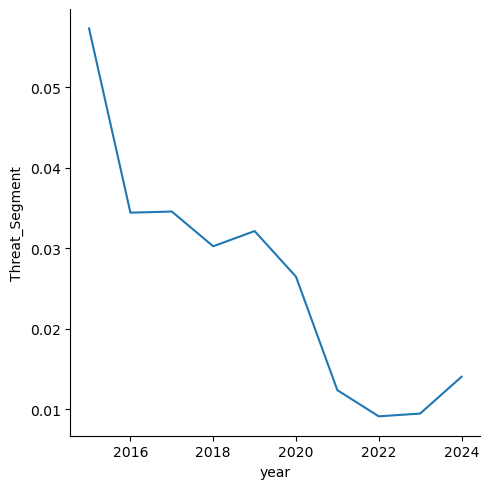

In [35]:
sns.relplot(x = fact["year"] , y= fact["Threat_Segment"] == "1. Minimal Threat (Unarmed Static)" , kind="line" , errorbar = None  )
plt.show()

# ------------------------------------------------------------------
# 4 Socioeconomic deep dive
# ------------------------------------------------------------------

# Q-18 Is precenct of people below poverty and median house hold income correlated with an increase in incidents ?

<Figure size 2000x1000 with 0 Axes>

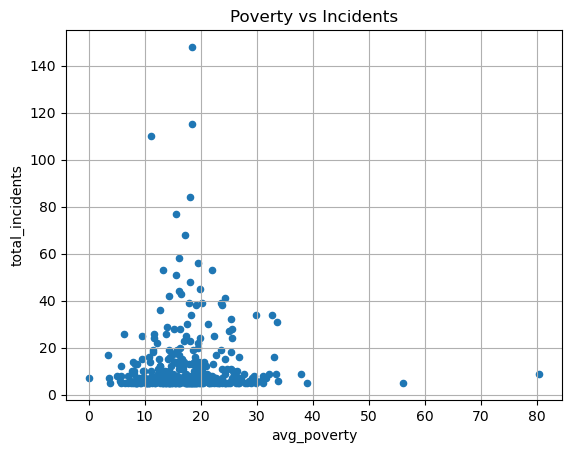

<Figure size 2000x1000 with 0 Axes>

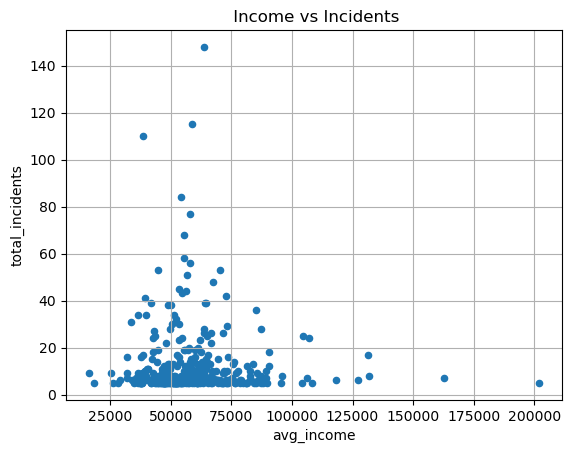

In [36]:
city_agg = data_analysis_complete.groupby(['City', 'Code']).agg(
    avg_poverty=('PercentOfPeopleBelowPovertyLevel', 'mean'),
    avg_income=('Median household income', 'mean'),
    total_incidents=('name', 'count')
).reset_index()
city_agg_filtered = city_agg[city_agg['total_incidents'] >= 5]

plt.figure(figsize=(20, 10))
city_agg_filtered.plot(
    kind='scatter', 
    x='avg_poverty', 
    y='total_incidents', 
    title='Poverty vs Incidents'
)
plt.grid()
plt.show()

plt.figure(figsize=(20, 10))
city_agg_filtered.plot(
    kind='scatter', 
    x='avg_income', 
    y='total_incidents', 
    title=' Income vs Incidents'
)
plt.grid()
plt.show()

In [37]:
city_agg[city_agg["total_incidents"] > 80].sort_values(by=["total_incidents"] , ascending=False)

,City,Code,avg_poverty,avg_income,total_incidents
1989,Los Angeles city,CA,18.506757,63701.702703,148
2661,Phoenix city,AZ,18.410435,58774.043478,115
1075,Emhouse town,TX,11.080909,38786.390909,110
3005,San Antonio city,TX,18.050000,54282.833333,84


# Q-19 is poverty correlated with the rate of unarmed victims?

C:\Users\dell\AppData\Local\Temp\ipykernel_1204\3803946470.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_agg_unarmed_filtered['unarmed_rate_pct'] = city_agg_unarmed_filtered['unarmed_rate'] * 100


<Figure size 1400x700 with 0 Axes>

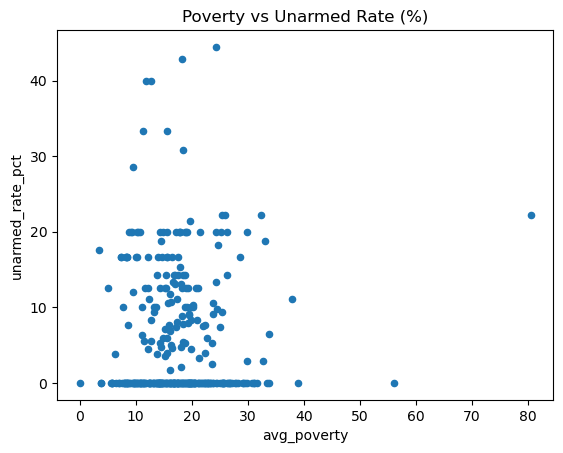

In [38]:
city_agg_unarmed = data_analysis_complete.groupby(['City', 'Code']).agg(
    avg_poverty=('PercentOfPeopleBelowPovertyLevel', 'mean'),
    unarmed_rate=('is_unarmed', 'mean'),
    total_incidents=('name', 'count')
).reset_index()
city_agg_unarmed_filtered = city_agg_unarmed[city_agg_unarmed['total_incidents'] >= 5]
city_agg_unarmed_filtered['unarmed_rate_pct'] = city_agg_unarmed_filtered['unarmed_rate'] * 100

plt.figure(figsize=(14, 7))
city_agg_unarmed_filtered.plot(
    kind='scatter',
    x='avg_poverty',
    y='unarmed_rate_pct',
    title='Poverty vs Unarmed Rate (%)'
)
plt.show()

# Q - 20 Is the city's Black population share correlated with the total number of incidents?

<Figure size 1400x700 with 0 Axes>

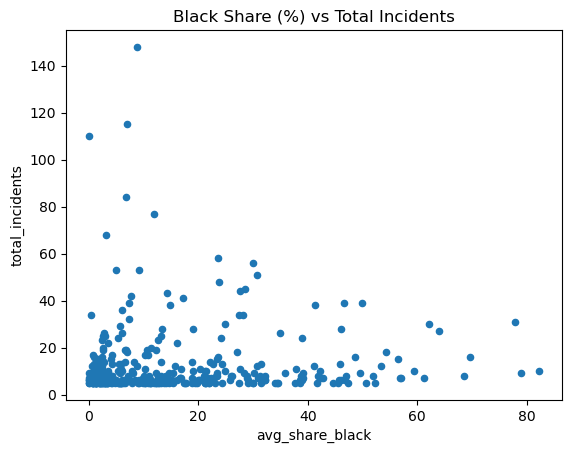

In [39]:
city_agg_share = data_analysis_complete.groupby(['City', 'Code']).agg(
    avg_share_black=('share_black', 'mean'),
    total_incidents=('name', 'count')
).reset_index()
city_agg_share_filtered = city_agg_share[city_agg_share['total_incidents'] >= 5]

plt.figure(figsize=(14, 7))
city_agg_share_filtered.plot(
    kind='scatter',
    x='avg_share_black',
    y='total_incidents',
    title='Black Share (%) vs Total Incidents'
)
plt.show()

In [40]:
correlation_coefficient = city_agg_share_filtered['avg_share_black'].corr(city_agg_share_filtered['total_incidents'])
correlation_coefficient

np.float64(0.0196391228260203)

# ------------------------------------------------------------------
# 5 Police Analysis & Policy Conclusions
# ------------------------------------------------------------------

# Q -21 Which police departments are most involved in incidents?

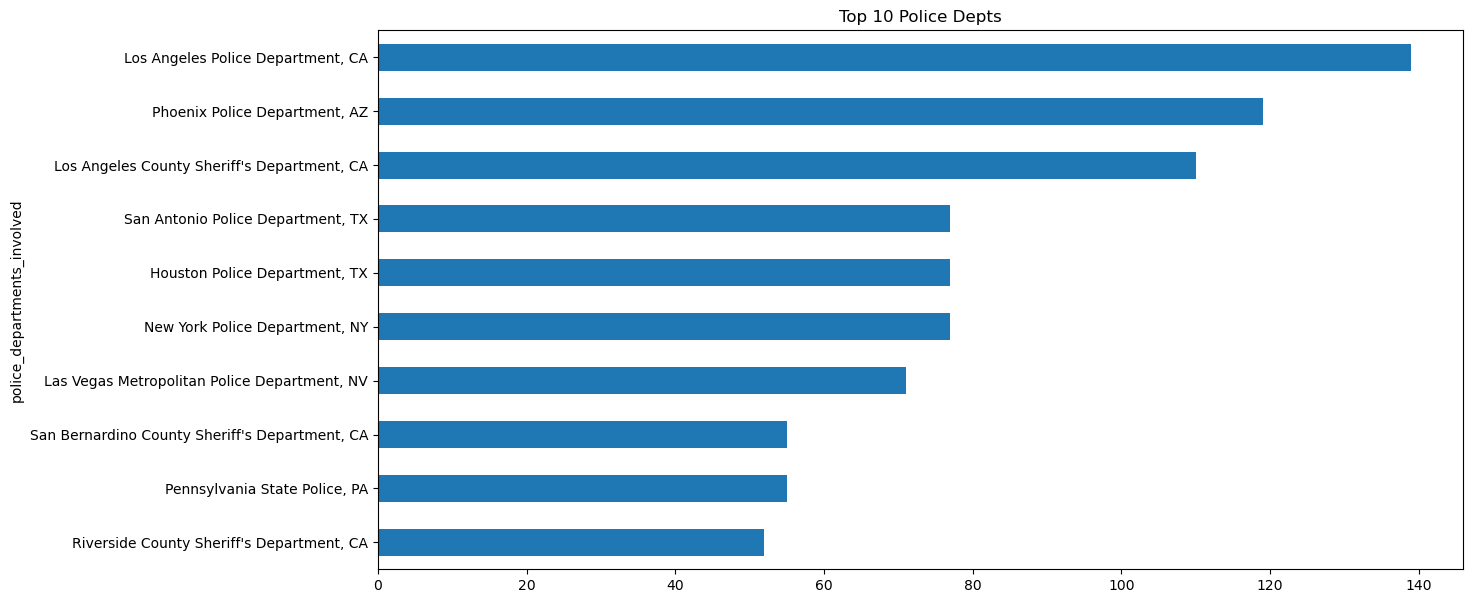

In [41]:
top_10_depts = fact['police_departments_involved'].value_counts().head(10).sort_values(ascending=True)

plt.figure(figsize=(14, 7))
top_10_depts.plot(kind='barh', title='Top 10 Police Depts')
plt.show()

# Q -22 Does body camera usage actually reduce the number of unarmed victims?

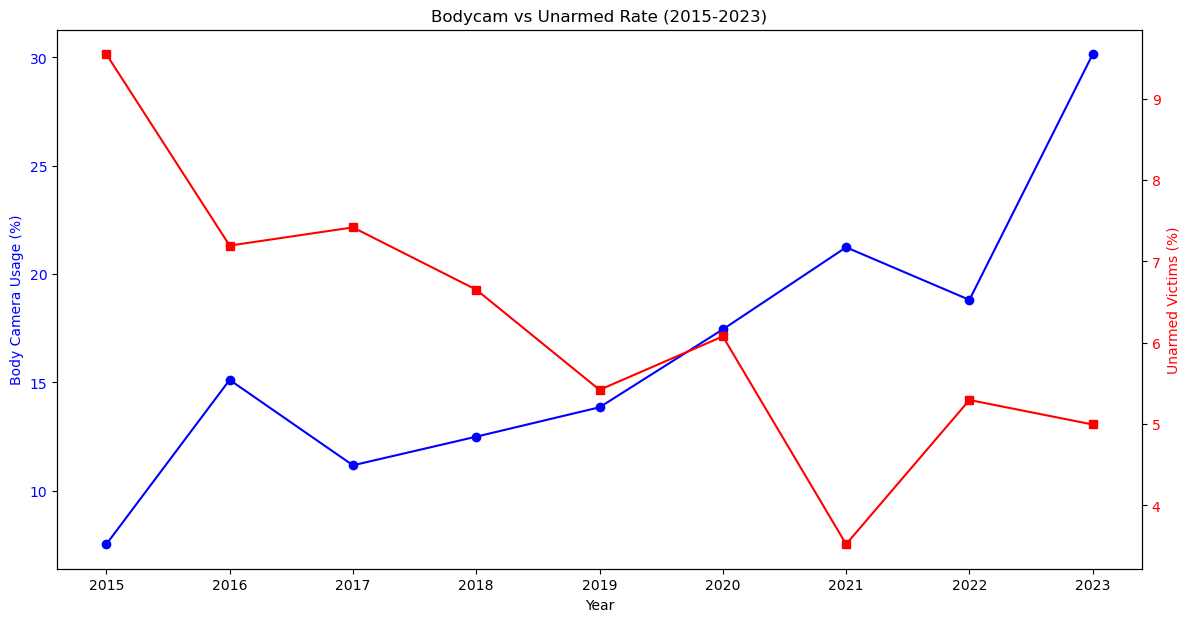

In [42]:
fact['is_unarmed'] = fact['armed'] == 'unarmed'
body_cam_pct = fact.groupby('year')['body_camera'].mean() * 100
unarmed_pct = fact.groupby('year')['is_unarmed'].mean() * 100
policy_df = pd.DataFrame({
    'Body_Camera_Usage_Pct': body_cam_pct,
    'Unarmed_Victims_Pct': unarmed_pct
})
policy_df_filtered = policy_df[policy_df.index < 2024]

fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(policy_df_filtered.index, policy_df_filtered['Body_Camera_Usage_Pct'], color='blue', marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Body Camera Usage (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  
ax2.plot(policy_df_filtered.index, policy_df_filtered['Unarmed_Victims_Pct'], color='red', marker='s')
ax2.set_ylabel('Unarmed Victims (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.set_xticks(policy_df_filtered.index.astype(int))
plt.title('Bodycam vs Unarmed Rate (2015-2023)')
plt.show()

# Q - 23  Is Body Camera usage higher in certain Threat Segments ? 

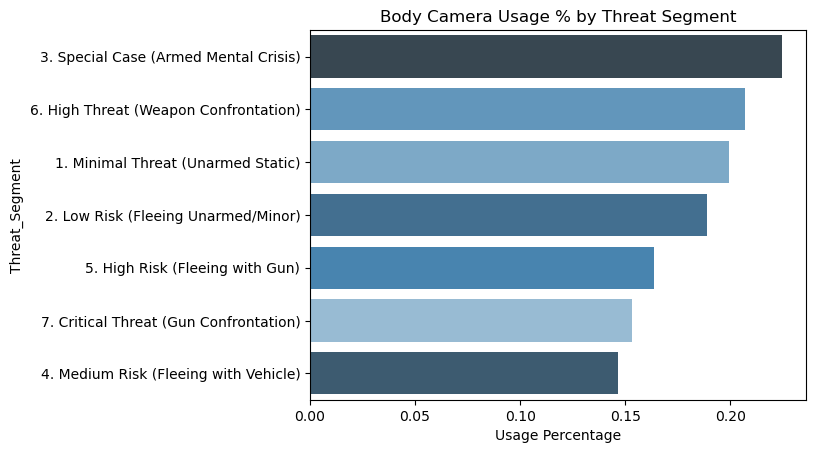

In [43]:
order_by_cam = fact.groupby('Threat_Segment')['body_camera'].mean().sort_values(ascending=False).index

sns.barplot(data=fact, y="Threat_Segment", x="body_camera",hue ="Threat_Segment",  order=order_by_cam, errorbar=None, palette="Blues_d")
plt.title("Body Camera Usage % by Threat Segment")
plt.xlabel("Usage Percentage")
plt.show()